In [1]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = "https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [4]:
df = df.drop(columns= ["Id"])

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [9]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)


test r2:  -3.0715943247509893e+22
train r2:  0.9494518297088844
test rmse:  76190488351.17424
train rmse:  0.08606817747710854


In [10]:
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

,feature,wt,wt_abs
15,GrLivArea,1.501695e+11,1.501695e+11
13,2ndFlrSF,-1.233520e+11,1.233520e+11
12,1stFlrSF,-1.112376e+11,1.112376e+11
219,GarageFinish_None,-1.072428e+11,1.072428e+11
134,Exterior2nd_CBlock,8.844505e+10,8.844505e+10
120,Exterior1st_CBlock,-8.844505e+10,8.844505e+10
224,GarageQual_None,7.930425e+10,7.930425e+10
229,GarageCond_None,7.930320e+10,7.930320e+10
166,BsmtCond_None,6.149525e+10,6.149525e+10
218,GarageType_None,-5.136464e+10,5.136464e+10


In [11]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)
result.head(10)

,actual,predict,error,error_abs
1270,12.468437,1.281787e+12,1.281787e+12,1.281787e+12
375,11.018629,9.484743e+11,9.484743e+11,9.484743e+11
1003,11.827043,1.510345e+09,1.510345e+09,1.510345e+09
1011,11.512925,1.066149e+09,1.066149e+09,1.066149e+09
120,12.100712,5.829678e+08,5.829678e+08,5.829678e+08
325,11.373663,-5.983023e+06,-5.983035e+06,5.983035e+06
810,12.106252,1.126501e+03,1.114395e+03,1.114395e+03
1386,12.429216,1.126502e+03,1.114073e+03,1.114073e+03
462,11.041048,1.174476e+01,7.037119e-01,7.037119e-01
30,10.596635,1.125554e+01,6.589056e-01,6.589056e-01


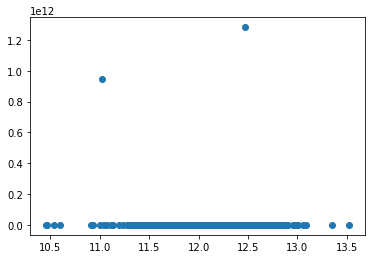

In [12]:
plt.scatter(y_test, y_test_pred)

In [13]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 345)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha=0.001, random_state=1))
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

print("intercept", est.intercept_)
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

test r2:  0.8593664050129219
train r2:  0.9417744914458408
test rmse:  0.15286617387973966
train rmse:  0.09546538100644747
intercept 12.020042844083623


,feature,wt,wt_abs
236,PoolQC_None,0.205815,0.205815
32,PoolArea,0.199534,0.199534
15,GrLivArea,0.109392,0.109392
3,OverallQual,0.065860,0.065860
5,YearBuilt,0.053681,0.053681
4,OverallCond,0.038850,0.038850
235,PoolQC_Gd,-0.037863,0.037863
257,SaleCondition_Partial,0.033361,0.033361
90,Condition2_PosN,-0.032722,0.032722
60,Neighborhood_Crawfor,0.031937,0.031937


In [14]:
summary[summary.wt>0.0].shape, summary.shape

((99, 3), (258, 3))

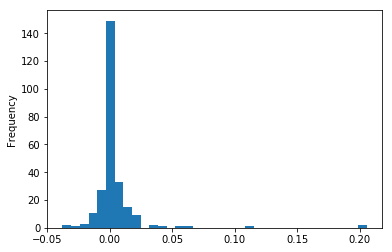

In [15]:
pd.Series(est.coef_).plot.hist(bins = 35)

std of error:  0.15304096857871438


,actual,predict,error,error_abs
1170,12.049419,10.784247,-1.265171,1.265171
30,10.596635,11.434895,0.838260,0.838260
495,10.460242,11.269758,0.809516,0.809516
462,11.041048,11.731647,0.690599,0.690599
916,10.471950,11.143218,0.671269,0.671269
197,12.367341,11.702708,-0.664633,0.664633
1324,11.898188,12.536961,0.638773,0.638773
588,11.870600,12.505611,0.635011,0.635011
1182,13.521139,12.919488,-0.601651,0.601651
1443,11.703546,11.280041,-0.423505,0.423505


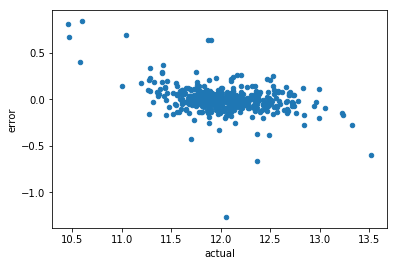

In [16]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)

result.plot.scatter("actual", "error")
print("std of error: ", result.error.std())
result.head(10)


In [17]:
result.sort_values("actual", ascending=False).head()

,actual,predict,error,error_abs
1182,13.521139,12.919488,-0.601651,0.601651
898,13.323927,13.042664,-0.281263,0.281263
1046,13.229568,13.065293,-0.164275,0.164275
440,13.226723,13.078273,-0.148451,0.148451
1243,13.049793,12.955460,-0.094333,0.094333


In [18]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Ridge(alpha=150.0, random_state=1))
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

print("intercept", est.intercept_)
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

test r2:  0.8774960380905438
train r2:  0.9302792062779718
test rmse:  0.15215768645511485
train rmse:  0.10108135338296527
intercept 12.032638784447805


,feature,wt,wt_abs
3,OverallQual,0.052883,0.052883
15,GrLivArea,0.040431,0.040431
12,1stFlrSF,0.029292,0.029292
70,Neighborhood_NridgHt,0.028174,0.028174
4,OverallCond,0.027186,0.027186
25,GarageCars,0.027166,0.027166
22,TotRmsAbvGrd,0.023488,0.023488
60,Neighborhood_Crawfor,0.023127,0.023127
13,2ndFlrSF,0.022081,0.022081
76,Neighborhood_StoneBr,0.021864,0.021864


std of error:  0.1523281034460113


,actual,predict,error,error_abs
30,10.596635,11.504242,0.907607,0.907607
495,10.460242,11.365491,0.905249,0.905249
916,10.471950,11.245620,0.773671,0.773671
462,11.041048,11.717703,0.676655,0.676655
812,10.932982,11.527547,0.594565,0.594565
968,10.542706,11.109922,0.567215,0.567215
1432,11.074421,11.588141,0.513720,0.513720
1000,11.314475,10.856873,-0.457602,0.457602
1270,12.468437,12.040374,-0.428063,0.428063
1279,11.133128,11.537948,0.404820,0.404820


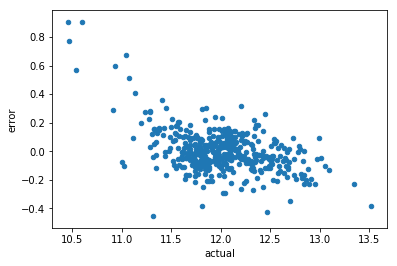

In [19]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)

result.plot.scatter("actual", "error")
print("std of error: ", result.error.std())
result.head(10)



In [20]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.ElasticNet(alpha=0.01, l1_ratio=0.5
                            , random_state=1423423))
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

print("intercept", est.intercept_)
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

test r2:  0.8832497152982852
train r2:  0.9119521556819916
test rmse:  0.1485414992986777
train rmse:  0.11359239347908372
intercept 12.032638784447805


,feature,wt,wt_abs
15,GrLivArea,0.091909,0.091909
3,OverallQual,0.088640,0.088640
25,GarageCars,0.049258,0.049258
5,YearBuilt,0.035001,0.035001
4,OverallCond,0.028759,0.028759
70,Neighborhood_NridgHt,0.026675,0.026675
60,Neighborhood_Crawfor,0.026182,0.026182
39,MSZoning_RM,-0.021363,0.021363
90,Condition2_PosN,-0.020887,0.020887
16,BsmtFullBath,0.019741,0.019741


std of error:  0.14868402448228435


,actual,predict,error,error_abs
495,10.460242,11.394600,0.934358,0.934358
30,10.596635,11.483371,0.886736,0.886736
916,10.471950,11.233221,0.761271,0.761271
812,10.932982,11.606818,0.673836,0.673836
462,11.041048,11.691958,0.650910,0.650910
968,10.542706,11.178766,0.636060,0.636060
1432,11.074421,11.570181,0.495760,0.495760
970,11.813030,11.397264,-0.415766,0.415766
3,11.849398,12.253793,0.404396,0.404396
1279,11.133128,11.536853,0.403725,0.403725


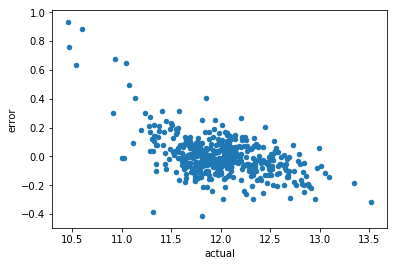

In [21]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)

result.plot.scatter("actual", "error")
print("std of error: ", result.error.std())
result.head(10)


In [23]:
target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.ElasticNet(alpha=0.01, l1_ratio=0.5
                            , random_state=1423423))
])

scores = model_selection.cross_val_score(pipe, X, y, cv=5, scoring="r2")
np.mean(scores), scores

(0.8639817940552907,
 array([0.91455065, 0.87642252, 0.87174614, 0.89602138, 0.76116829]))

In [40]:
np.random.random(10)* 0.01  + 0.035

array([0.0433595 , 0.04242704, 0.04052805, 0.04139028, 0.03528176,
       0.03937807, 0.03924921, 0.04220564, 0.03539473, 0.03862903])

In [38]:
0.01 * np.random.random(10) + 0.075

array([0.07842407, 0.07635761, 0.08462743, 0.0838907 , 0.07845274,
       0.07957377, 0.07691563, 0.077647  , 0.08268867, 0.07563811])

In [41]:
param_grid = {
    "est__alpha": np.random.random(10)* 0.01  + 0.035, 
    "est__l1_ratio": 0.01 * np.random.random(10) + 0.075
}

gsearch =  model_selection.GridSearchCV(pipe, param_grid, cv = 5, verbose=1, n_jobs=8)

In [42]:
gsearch.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    6.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('est',
                                        ElasticNet(alpha=0.01, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                   

In [43]:
gsearch.best_score_

0.8670716528309322

In [44]:
gsearch.best_params_

{'est__alpha': 0.044672444348544796, 'est__l1_ratio': 0.0828843892878205}

In [45]:
import pickle

In [47]:
with open("/tmp/model.pickle", "wb") as f:
    pickle.dump(gsearch, f)

In [49]:
!ls -lh /tmp/model.pickle

-rw-r--r--  1 abasar  wheel    23K May 29 09:54 /tmp/model.pickle


In [50]:
with open("/tmp/model.pickle", "rb") as f:
    model = pickle.load(f)

In [55]:
model.score(X, y)

0.9115186465028974

In [56]:
np.linspace(0, .5, 5)

array([0.   , 0.125, 0.25 , 0.375, 0.5  ])